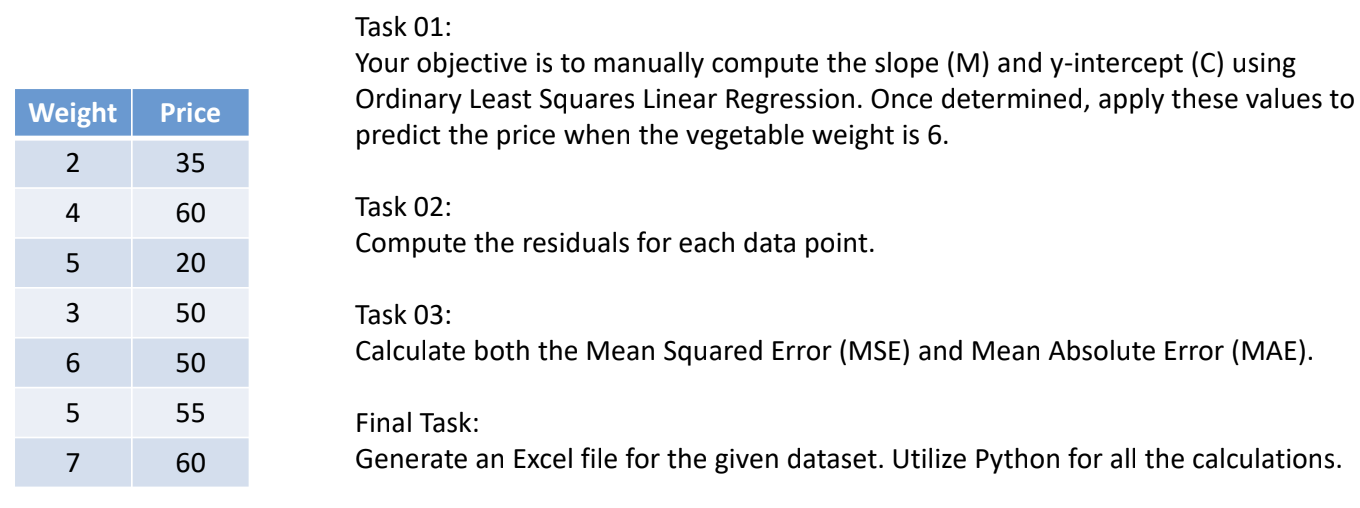

In [23]:
from utils.file_utils import load_csv_from_url

rawData = {
    'weight': [2,4,5,3,6,5,7],
    'price': [35,60,20,50,50,55,60]
}


# make a dataframe from the dictionary
import pandas as pd
dataset = pd.DataFrame(rawData)

print(dataset.head())
print(dataset.shape)

   weight  price
0       2     35
1       4     60
2       5     20
3       3     50
4       6     50
(7, 2)


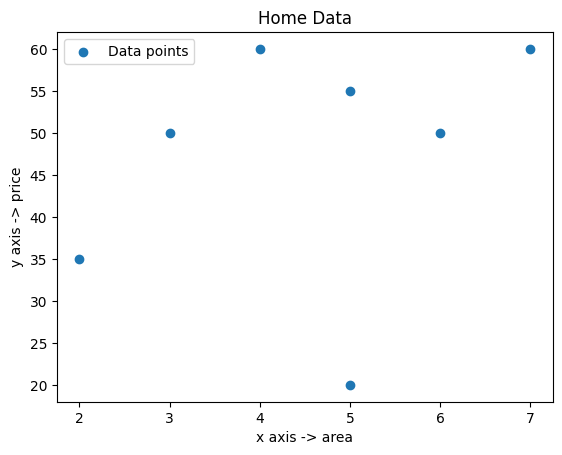

In [24]:
x = dataset.weight
y = dataset.price

#plotting the data
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.title("Home Data")
plt.xlabel("x axis -> area")
plt.ylabel("y axis -> price")

plt.legend(["Data points"])
plt.show()


find the best fit line using linear regression (y = mx + c) by hand

we need to find the value of m and c
The formula for the slope \( m \) in linear regression using means is:

$$
m = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sum{(x_i - \bar{x})^2}}
$$

In [25]:
import numpy as np

xMean = np.sum(x)/len(x)
yMean = np.sum(y)/len(y)

# loop through each data point and calculate (x-xMean) and (y-yMean)
xMeanDiff = x - xMean
yMeanDiff = y - yMean

sumXYMeanDiff = np.sum(xMeanDiff * yMeanDiff)
sumXYMeanDiffSquare = np.sum(xMeanDiff**2)

# calculate the slope
slope = sumXYMeanDiff/sumXYMeanDiffSquare

print(f"Slope: {slope}")


Slope: 2.620967741935484


In [26]:
# calculate the intercept
intercept = yMean - slope*xMean
print(f"Intercept: {intercept}")

Intercept: 35.16129032258065


In [27]:
## model
# yPred = slope*x + intercept

## take input from user and predict the price
area = float(input("Enter the area of the house: "))
price = slope*area + intercept
print(f"Price of the house: {price} for area: {area}")

Price of the house: 56.12903225806452 for area: 8.0


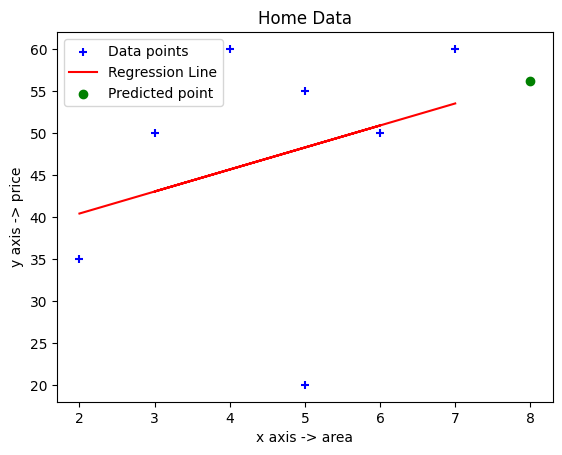

In [28]:
# plot the data points and the line
plt.scatter(x, y, color='blue', marker='+')
plt.plot(x, slope*x + intercept, color='red')
plt.title("Home Data")
plt.xlabel("x axis -> area")
plt.ylabel("y axis -> price")

#plot the area entered by the user
plt.scatter(area, price, color='green')


plt.legend(["Data points","Regression Line",  "Predicted point"])
plt.show()


In [29]:
# residuals = y - yPred
yPred = slope*x + intercept
residuals = y - yPred

# add predicted values to the dataset
dataset['yPred'] = yPred
print(dataset.head())

# add residuals to the dataset
dataset['residuals'] = residuals
print(dataset.head())



   weight  price      yPred
0       2     35  40.403226
1       4     60  45.645161
2       5     20  48.266129
3       3     50  43.024194
4       6     50  50.887097
   weight  price      yPred  residuals
0       2     35  40.403226  -5.403226
1       4     60  45.645161  14.354839
2       5     20  48.266129 -28.266129
3       3     50  43.024194   6.975806
4       6     50  50.887097  -0.887097


$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

In [30]:
# find the errors
# mean squared error (MSE)
mse = np.sum(residuals**2)/len(y)
print(f"Mean Squared Error: {mse}")


# mean absolute error (MAE)
mae = np.sum(np.abs(residuals))/len(y)
print(f"Mean Absolute Error: {mae}")




Mean Squared Error: 167.30990783410135
Mean Absolute Error: 9.87327188940092


In [31]:
from utils.file_utils import make_path

# export the dataset with residuals
pathToSave = make_path("output/homedata_with_residuals.csv")
dataset.to_csv(pathToSave, index=False)
print("Dataset with residuals saved successfully")


Dataset with residuals saved successfully
